# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import seaborn as sns
from scipy import stats

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [2]:
def generate_uniform_random_samples(bottom, ceiling, count):
    """
    Genereert n willekeurige waarden uit een uniforme verdeling tussen lower en upper.
    
    Parameters:
        bottom (float): Ondergrens van het interval
        ceiling (float): Bovengrens van het interval
        count (int): Aantal te genereren waarden

    Returns:
        list of float: n willekeurige waarden in het opgegeven bereik
    """
    scale = ceiling - bottom
    samples = stats.uniform.rvs(loc=bottom, scale=scale, size=count)
    return samples

**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

In [3]:
# your code here
array_1 = generate_uniform_random_samples(10, 15, 100)
array_2 = generate_uniform_random_samples(10, 60, 1000)


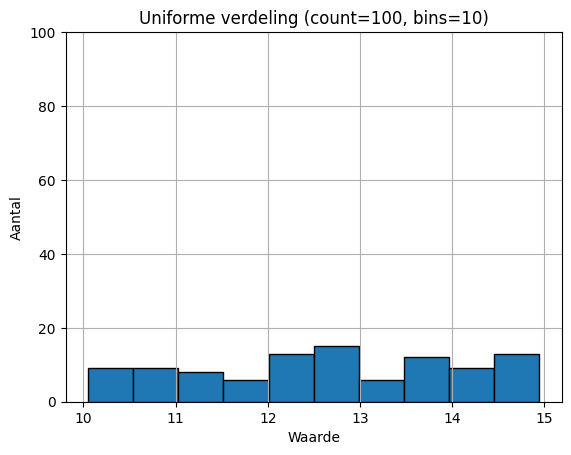

In [4]:
# your code here

plt.hist(array_1, bins=10, edgecolor='black')
plt.title('Uniforme verdeling (count=100, bins=10)')
plt.xlabel('Waarde')
plt.ylabel('Aantal')
plt.ylim(top=100)  # Max y-as limiet instellen op 100
plt.grid(True)
plt.show()

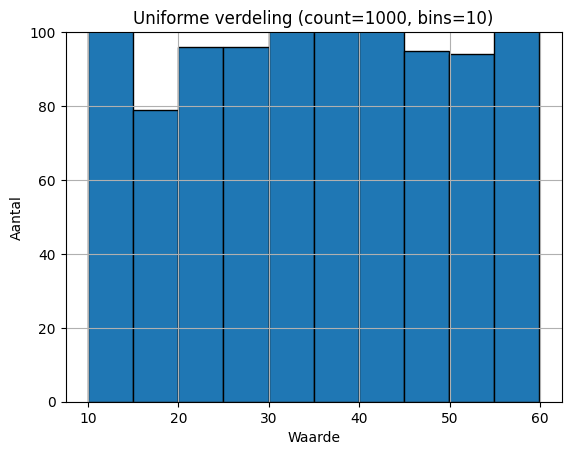

In [5]:
# your code here

plt.hist(array_2, bins=10, edgecolor='black')
plt.title('Uniforme verdeling (count=1000, bins=10)')
plt.xlabel('Waarde')
plt.ylabel('Aantal')
plt.ylim(top=100)  # Max y-as limiet instellen op 100
plt.grid(True)
plt.show()

How are the two distributions different?

In [6]:
# your answer below
# First one has fewer items in a less wide range 
# second one has 10 times more items and a wider range

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

In [7]:

def generate_normal_samples(mean, std_dev, count):
    """
    Genereert n willekeurige waarden uit een normale verdeling met gegeven gemiddelde en standaarddeviatie.
    
    Parameters:
        mean (float): Het gemiddelde (μ) van de verdeling
        std_dev (float): De standaarddeviatie (σ) van de verdeling
        count (int): Het aantal te genereren waarden

    Returns:
        list of float: n normaalverdeelde willekeurige waarden
    """
    samples = stats.norm.rvs(loc=mean, scale=std_dev, size=count)
    return samples

In [8]:
# your code here
sample_1 = generate_normal_samples(10, 1, 1000)
sample_2 = generate_normal_samples(10, 50, 1000)

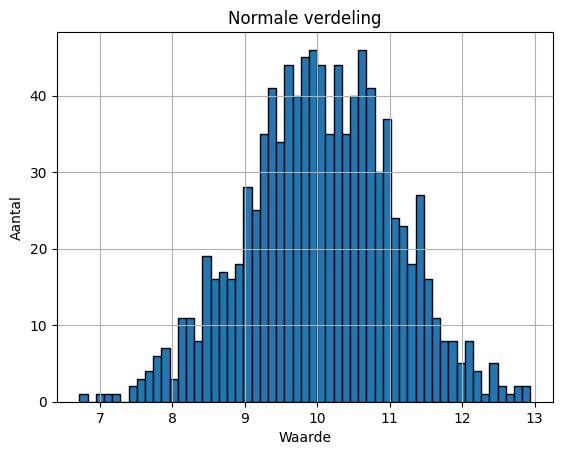

In [9]:
# your code here

plt.hist(sample_1, bins=55, edgecolor='black')
plt.title('Normale verdeling')
plt.xlabel('Waarde')
plt.ylabel('Aantal')
plt.grid(True)
plt.show()

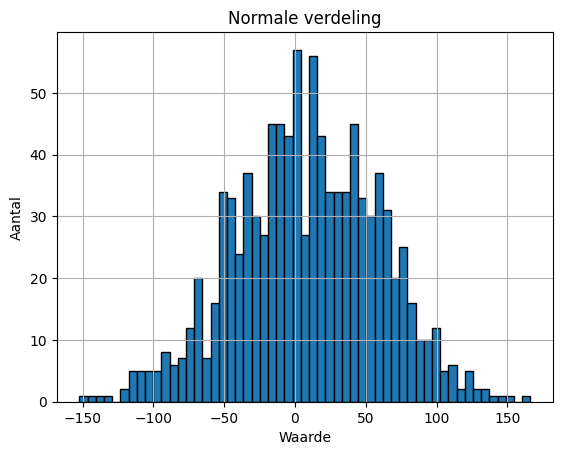

In [10]:
# your code here

plt.hist(sample_2, bins=55, edgecolor='black')
plt.title('Normale verdeling')
plt.xlabel('Waarde')
plt.ylabel('Aantal')
plt.grid(True)
plt.show()

How are the two distributions different?

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

In [12]:
# your code here
vehicles = pd.read_csv("vehicles.csv")


First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

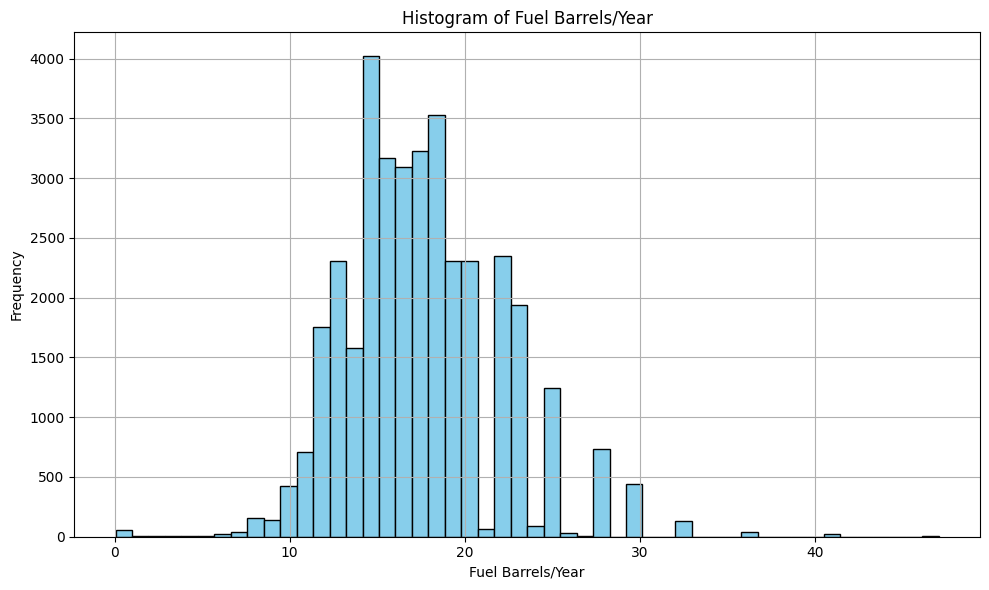

In [16]:

plt.figure(figsize=(10, 6))
plt.hist(vehicles['Fuel Barrels/Year'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Fuel Barrels/Year')
plt.xlabel('Fuel Barrels/Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

2. CO2 Emission Grams/Mile 

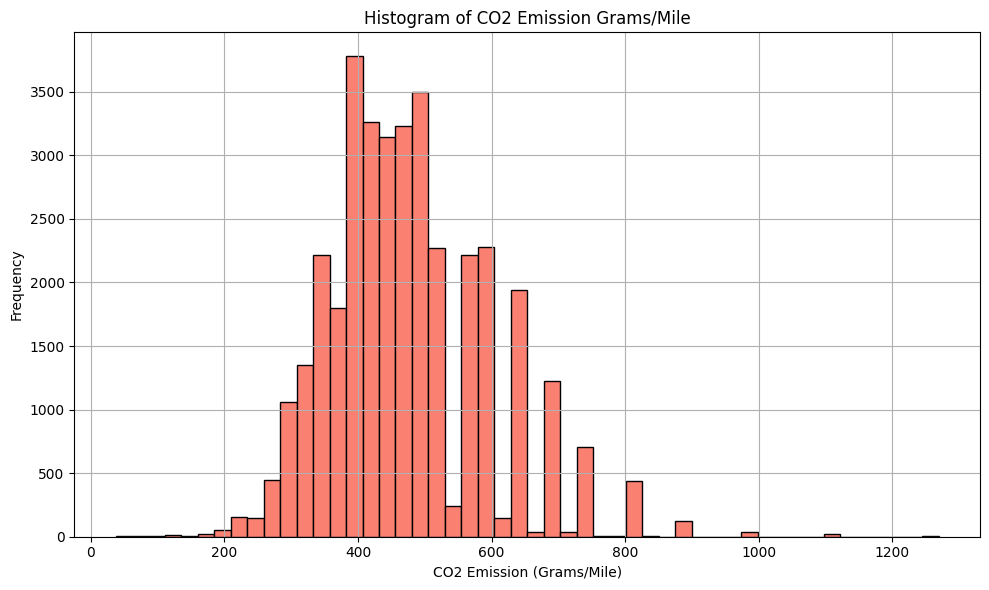

In [19]:
# your code here
plt.figure(figsize=(10, 6))
plt.hist(vehicles['CO2 Emission Grams/Mile'], bins=50, color='salmon', edgecolor='black')
plt.title('Histogram of CO2 Emission Grams/Mile')
plt.xlabel('CO2 Emission (Grams/Mile)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

3. Combined MPG

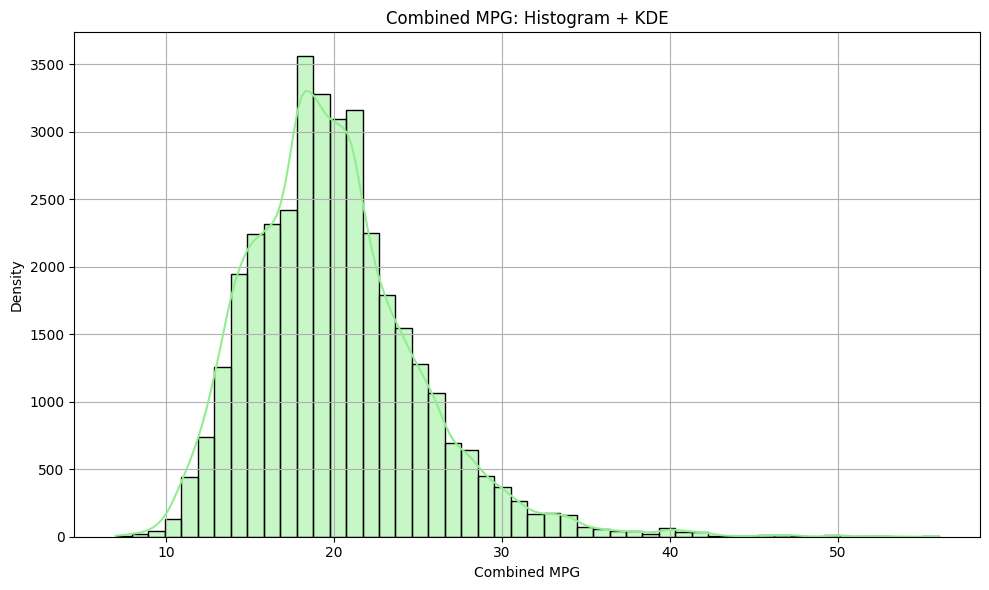

In [ ]:
# your code here
plt.figure(figsize=(10, 6))
plt.hist(vehicles['Combined MPG'], bins=50, color='lightgreen', edgecolor='black')
plt.title('Histogram of Combined MPG')
plt.xlabel('Combined MPG')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

Which one(s) of the variables are nearly normally distributed? How do you know?

In [ ]:
# your code here
# Columns we want to test
columns = ['Fuel Barrels/Year', 'CO2 Emission Grams/Mile', 'Combined MPG']

# Store results
for col in columns:
    data = vehicles[col].dropna()

    # Shapiro-Wilk Test (recommended for smaller datasets <5000)
    shapiro_stat, shapiro_p = stats.shapiro(data.sample(n=5000, random_state=1)) if len(data) > 5000 else stats.shapiro(data)

    # Kolmogorov-Smirnov Test against a normal distribution with same mean/std
    standardized = (data - data.mean()) / data.std()
    ks_stat, ks_p = stats.kstest(standardized, 'norm')

    print(f'--- {col} ---')
    print(f'Shapiro-Wilk p-value: {shapiro_p:.4f} --> {"Normal" if shapiro_p > 0.05 else "Not normal"}')
    print(f'KS-test p-value:       {ks_p:.4f} --> {"Normal" if ks_p > 0.05 else "Not normal"}')
    print()


--- Fuel Barrels/Year ---
Shapiro-Wilk p-value: 0.0000 --> Niet normaal
KS-test p-value:       0.0000 --> Niet normaal

--- CO2 Emission Grams/Mile ---
Shapiro-Wilk p-value: 0.0000 --> Niet normaal
KS-test p-value:       0.0000 --> Niet normaal

--- Combined MPG ---
Shapiro-Wilk p-value: 0.0000 --> Niet normaal
KS-test p-value:       0.0000 --> Niet normaal



None of them are normally ditributed. 

## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with the size of 10 and 100.

1. Plot the distributions as histograms with the nubmer of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

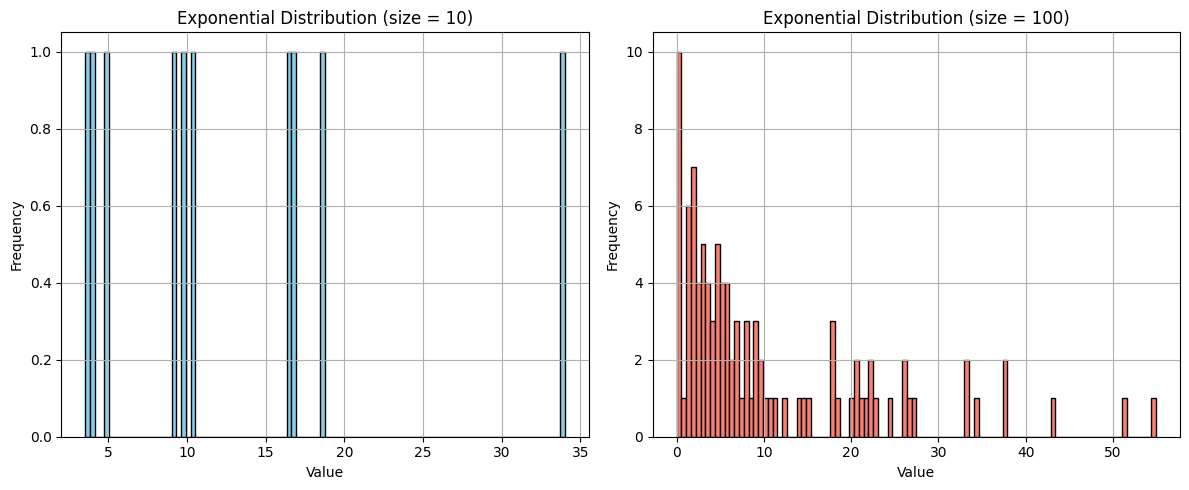

In [24]:
# your code here
# 1. Define function to generate exponentially distributed numbers
def generate_exponential_data(mean, size):
    scale = mean  # in numpy, 'scale' = 1/lambda = mean
    return np.random.exponential(scale=scale, size=size)

# 2. Generate sequences
data_10 = generate_exponential_data(mean=10, size=10)
data_100 = generate_exponential_data(mean=10, size=100)

# 3. Plot histograms
plt.figure(figsize=(12, 5))

# Histogram for size 10
plt.subplot(1, 2, 1)
plt.hist(data_10, bins=100, color='skyblue', edgecolor='black')
plt.title('Exponential Distribution (size = 10)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)

# Histogram for size 100
plt.subplot(1, 2, 2)
plt.hist(data_100, bins=100, color='salmon', edgecolor='black')
plt.title('Exponential Distribution (size = 100)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

How are the two distributions different?

The mean changes, so the distribution changes as well. 

## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [25]:
# your code here

# Parameters
mean = 10  # mean in minutes
lmbda = 1 / mean  # lambda = 1/mean
x = 15  # time in minutes

# Compute the CDF
probability = 1 - np.exp(-lmbda * x)

print(f"Probability that a customer spends less than {x} minutes in the bank: {probability:.4f}")

Probability that a customer spends less than 15 minutes in the bank: 0.7769


In [ ]:
# your answer here
# Hint: This is same as saying P(x<15)

What is the probability that the customer will spend more than 15 minutes

In [26]:
# your code here
probability_more_than_15 = np.exp(-lmbda * x)

print(f"Probability that a customer spends more than {x} minutes in the bank: {probability_more_than_15:.4f}")

Probability that a customer spends more than 15 minutes in the bank: 0.2231
